# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

# Import libraries

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# sklearn libraries 

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Get the data 

In [51]:
df = pd.read_csv('./College_Data', index_col = 0)

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [52]:
# check the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [53]:
# basic statistic 

df.describe().round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


# Exploratory Data Analysis

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

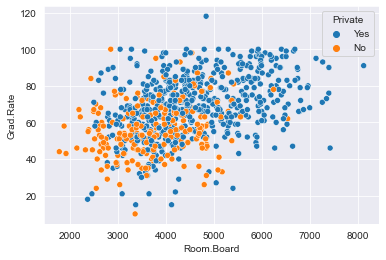

In [54]:
# display scatterpl between Grad.rate vs Room.Board with color private

sns.scatterplot( x = 'Room.Board', y = 'Grad.Rate', hue = 'Private', data = df)

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

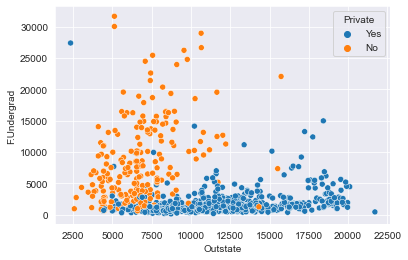

In [55]:
sns.scatterplot( x = 'Outstate', y = 'F.Undergrad', hue = 'Private', data = df)

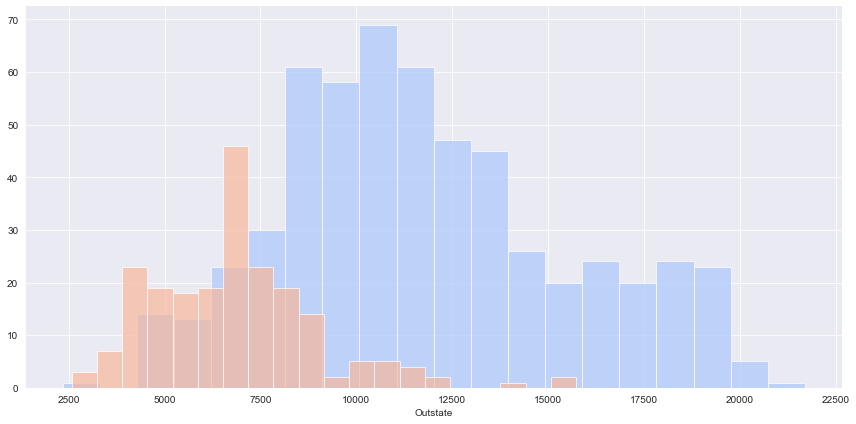

In [56]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

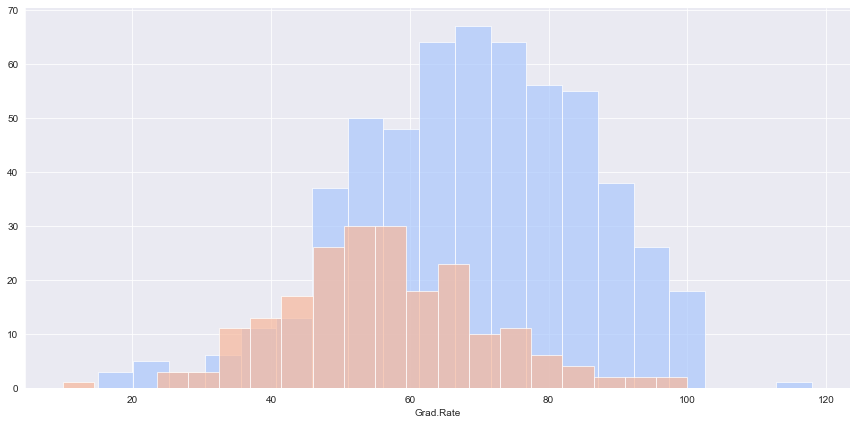

In [57]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [58]:
#What is the name of private school that is higher than 100% graduation rate? 

df[df['Grad.Rate'] > 100] 

# Cazenovia College 

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [59]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-59-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [60]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


/Users/yuyakondo/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


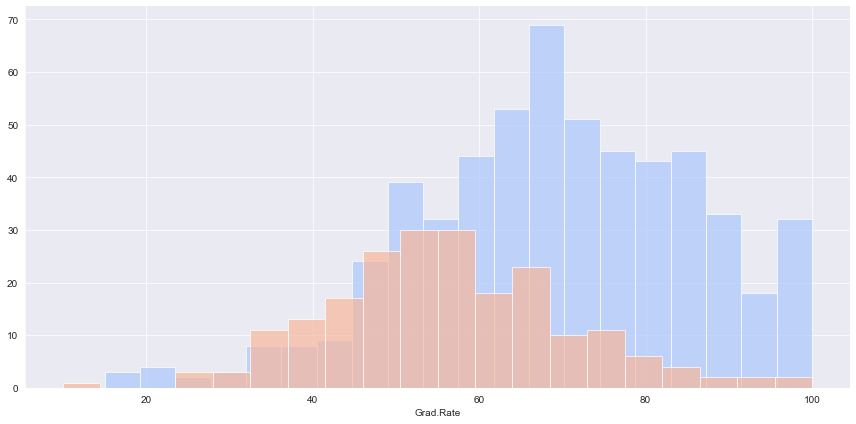

In [61]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# K mean Cluster Creation

In [70]:
# create instance 
 
kmeans = KMeans(n_clusters = 2)

In [72]:
# fit the model 

kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

In [73]:
# what are the cluster central vector?  

kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

# Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [74]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [76]:
df['Cluster'] = df['Private'].apply(converter)

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [77]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

